In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stat
from sklearn.model_selection import train_test_split
#import pylab
#import visuals as vs
#import visuals_withoutborder as vswb
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import MinMaxScaler
#from matplotlib.colors import ListedColormap
## Display all the columns of the dataframe
plt.style.use("ggplot")
#plt.style.use("fivethirtyeight")
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve,accuracy_score, multilabel_confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from datetime import datetime
import ssl
ssl_cert_reqs = ssl.CERT_NONE ##for SSL : CERTIFICATE VERIFY FAILED ISSUE
# # Multiple Output display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [10]:
#df = pd.read_csv('/home/mvisi/Project/DLP/Core/Leadgen_ML/Data/Leadgen_Leads.csv')
df = pd.read_csv('/home/mvisi/Project/DLP/Core/Leadgen_ML/Data/Leadgen_Leads_N.csv')

In [3]:
df.dtypes

Company_ID               object
Status                   object
IS_FINANCIAL_LEAD         int64
Company Name             object
CITY                     object
COMPANY_SIZE             object
NUMBER_OF_EMPLOYEES     float64
SIC_CODE                float64
INDUSTRY_DESCRIPTION     object
COMPANY_NETWORTH        float64
IMPORTER_EXPORTER        object
Rating                    int64
dtype: object

In [3]:
df.head()

,Company_ID,Status,IS_FINANCIAL_LEAD,Company Name,CITY,COMPANY_SIZE,NUMBER_OF_EMPLOYEES,SIC_CODE,INDUSTRY_DESCRIPTION,COMPANY_NETWORTH,IMPORTER_EXPORTER,Rating
0,1755658,Active,0,FESTIVE PRODUCTIONS LTD,Torfaen,Small,73.0,32990.0,32990 Other manufacturing not elsewhere classi...,889000.0,Importer,1
1,1755658,Active,0,FESTIVE PRODUCTIONS LTD,Torfaen,Small,73.0,32990.0,32990 Other manufacturing not elsewhere classi...,889000.0,Importer,1
2,3142495,Active,0,CLEARWATER FINE FOODS (EUROPE) LTD,London,Small,0.0,46380.0,46380 Wholesale of other food including fish c...,NaN,Importer,0
3,5400334,Active,0,MAHR IMPEX UK LTD,West Yorkshire,Small,5.0,32500.0,32500 Manufacture of medical and dental instru...,NaN,Importer,0
4,1755658,Active,0,FESTIVE PRODUCTIONS LTD,Torfaen,Small,73.0,32990.0,32990 Other manufacturing not elsewhere classi...,889000.0,Importer,1


In [139]:
# converting 'IS_FINANCIAL_LEAD' from boolean to Object
#df['IS_FINANCIAL_LEAD'] = df['IS_FINANCIAL_LEAD'].astype(object)

In [11]:
dfZERO = df[df['Rating'] ==0]
dfZERO.head()

,Company_ID,Status,IS_FINANCIAL_LEAD,Company Name,CITY,COMPANY_SIZE,NUMBER_OF_EMPLOYEES,SIC_CODE,INDUSTRY_DESCRIPTION,COMPANY_NETWORTH,IMPORTER_EXPORTER,Rating
2,3142495,Active,0,CLEARWATER FINE FOODS (EUROPE) LTD,London,Small,0.0,46380.0,46380 Wholesale of other food including fish c...,NaN,Importer,0
3,5400334,Active,0,MAHR IMPEX UK LTD,West Yorkshire,Small,5.0,32500.0,32500 Manufacture of medical and dental instru...,NaN,Importer,0
5,10043678,Active,0,JUICE-E-VAPORIUM LIMITED,Lincolnshire,Small,2.0,47190.0,47190 Other retail sale in non specialised sto...,NaN,Importer,0
6,9130259,Active,0,TR GRANTS LTD,London,Small,1.0,46380.0,46380 Wholesale of other food including fish c...,NaN,Importer,0
7,5083700,Active,0,NATURAL BALANCE FOODS LTD,Aylesbury,Large,64.0,10890.0,10890 Manufacture of other food products not e...,NaN,Exporter,0


In [5]:
df.dtypes

Company_ID               object
Status                   object
IS_FINANCIAL_LEAD         int64
Company Name             object
CITY                     object
COMPANY_SIZE             object
NUMBER_OF_EMPLOYEES     float64
SIC_CODE                float64
INDUSTRY_DESCRIPTION     object
COMPANY_NETWORTH        float64
IMPORTER_EXPORTER        object
Rating                    int64
dtype: object

In [5]:
df.Status.value_counts()

Active      28026
Inactive        2
Name: Status, dtype: int64

In [12]:
df_required = df[['Status', 'IS_FINANCIAL_LEAD','CITY',
       'COMPANY_SIZE', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'INDUSTRY_DESCRIPTION', 'COMPANY_NETWORTH', 'IMPORTER_EXPORTER',
       'Rating']]

In [6]:
df_required.head()

,Status,IS_FINANCIAL_LEAD,CITY,COMPANY_SIZE,NUMBER_OF_EMPLOYEES,SIC_CODE,INDUSTRY_DESCRIPTION,COMPANY_NETWORTH,IMPORTER_EXPORTER,Rating
0,Active,0,Torfaen,Small,73.0,32990.0,32990 Other manufacturing not elsewhere classi...,889000.0,Importer,1
1,Active,0,Torfaen,Small,73.0,32990.0,32990 Other manufacturing not elsewhere classi...,889000.0,Importer,1
2,Active,0,London,Small,0.0,46380.0,46380 Wholesale of other food including fish c...,NaN,Importer,0
3,Active,0,West Yorkshire,Small,5.0,32500.0,32500 Manufacture of medical and dental instru...,NaN,Importer,0
4,Active,0,Torfaen,Small,73.0,32990.0,32990 Other manufacturing not elsewhere classi...,889000.0,Importer,1


In [13]:
df_required_COMID = df[['Status', 'IS_FINANCIAL_LEAD','CITY',
       'COMPANY_SIZE', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'INDUSTRY_DESCRIPTION', 'COMPANY_NETWORTH', 'IMPORTER_EXPORTER',
       'Rating', 'Company_ID']]

In [8]:
df_required.Rating.value_counts()

0    27216
1      607
3      113
2       92
Name: Rating, dtype: int64

### Data Analysis

In [14]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_required.columns if df_required[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_required[feature].isnull().mean(), 4),  ' % missing values')

CITY 0.0137  % missing values
NUMBER_OF_EMPLOYEES 0.0052  % missing values
SIC_CODE 0.0192  % missing values
INDUSTRY_DESCRIPTION 0.0165  % missing values
COMPANY_NETWORTH 0.2814  % missing values


In [15]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_required_COMID.columns if df_required_COMID[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_required_COMID[feature].isnull().mean(), 4),  ' % missing values')

CITY 0.0137  % missing values
NUMBER_OF_EMPLOYEES 0.0052  % missing values
SIC_CODE 0.0192  % missing values
INDUSTRY_DESCRIPTION 0.0165  % missing values
COMPANY_NETWORTH 0.2814  % missing values


In [6]:
print ("Rows     : " ,df_required.shape[0])
print ("Columns  : " ,df_required.shape[1])
print ("\nFeatures : \n" ,df_required.columns.tolist())
print ("\nMissing values :  ", df_required.isnull().any())
print ("\nUnique values :  \n",df_required.nunique())

Rows     :  28028
Columns  :  10

Features : 
 ['Status', 'IS_FINANCIAL_LEAD', 'CITY', 'COMPANY_SIZE', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE', 'INDUSTRY_DESCRIPTION', 'COMPANY_NETWORTH', 'IMPORTER_EXPORTER', 'Rating']

Missing values :   Status                  False
IS_FINANCIAL_LEAD       False
CITY                     True
COMPANY_SIZE            False
NUMBER_OF_EMPLOYEES      True
SIC_CODE                 True
INDUSTRY_DESCRIPTION     True
COMPANY_NETWORTH         True
IMPORTER_EXPORTER       False
Rating                  False
dtype: bool

Unique values :  
 Status                     2
IS_FINANCIAL_LEAD          2
CITY                    1283
COMPANY_SIZE               4
NUMBER_OF_EMPLOYEES      745
SIC_CODE                 534
INDUSTRY_DESCRIPTION     919
COMPANY_NETWORTH        6936
IMPORTER_EXPORTER          3
Rating                     4
dtype: int64


In [16]:
### Indetify categorical features
categorical_features=[feature for feature in df_required.columns if df_required[feature].dtypes=='O']
categorical_features

['Status', 'CITY', 'COMPANY_SIZE', 'INDUSTRY_DESCRIPTION', 'IMPORTER_EXPORTER']

In [17]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_required[feature].unique())))

The feature is Status and number of categories are 2
The feature is CITY and number of categories are 1284
The feature is COMPANY_SIZE and number of categories are 4
The feature is INDUSTRY_DESCRIPTION and number of categories are 920
The feature is IMPORTER_EXPORTER and number of categories are 3


In [18]:
#Handling numeric NULL values
df_required['COMPANY_NETWORTH_var'] = np.where(df_required['COMPANY_NETWORTH'].isnull(),1,0)
df_required['SIC_CODE_var'] = np.where(df_required['SIC_CODE'].isnull(),1,0)
df_required['NUMBER_OF_EMPLOYEES_var'] = np.where(df_required['NUMBER_OF_EMPLOYEES'].isnull(),1,0)

In [19]:
#Handling numeric NULL values
df_required_COMID['COMPANY_NETWORTH_var'] = np.where(df_required_COMID['COMPANY_NETWORTH'].isnull(),1,0)
df_required_COMID['SIC_CODE_var'] = np.where(df_required_COMID['SIC_CODE'].isnull(),1,0)
df_required_COMID['NUMBER_OF_EMPLOYEES_var'] = np.where(df_required_COMID['NUMBER_OF_EMPLOYEES'].isnull(),1,0)
#df_required_COMID

In [20]:
COMPANY_NETWORTH_Freq = df_required['COMPANY_NETWORTH'].mode()[0]
SIC_CODE_Freq = df_required['SIC_CODE'].mode()[0]
NUMBER_OF_EMPLOYEES_Freq = df_required['NUMBER_OF_EMPLOYEES'].mean()


In [21]:
COMPANY_NETWORTH_Freq = df_required_COMID['COMPANY_NETWORTH'].mode()[0]
SIC_CODE_Freq = df_required_COMID['SIC_CODE'].mode()[0]
NUMBER_OF_EMPLOYEES_Freq = df_required_COMID['NUMBER_OF_EMPLOYEES'].mean()

In [22]:
df_required['COMPANY_NETWORTH'].fillna(COMPANY_NETWORTH_Freq, inplace=True)
df_required['SIC_CODE'].fillna(SIC_CODE_Freq, inplace=True)
df_required['NUMBER_OF_EMPLOYEES'].fillna(NUMBER_OF_EMPLOYEES_Freq, inplace=True)

In [23]:
df_required_COMID['COMPANY_NETWORTH'].fillna(COMPANY_NETWORTH_Freq, inplace=True)
df_required_COMID['SIC_CODE'].fillna(SIC_CODE_Freq, inplace=True)
df_required_COMID['NUMBER_OF_EMPLOYEES'].fillna(NUMBER_OF_EMPLOYEES_Freq, inplace=True)

In [111]:
df_required.columns

Index(['Status', 'IS_FINANCIAL_LEAD', 'CITY', 'COMPANY_SIZE',
       'NUMBER_OF_EMPLOYEES', 'SIC_CODE', 'INDUSTRY_DESCRIPTION',
       'COMPANY_NETWORTH', 'IMPORTER_EXPORTER', 'Rating',
       'COMPANY_NETWORTH_var', 'SIC_CODE_var', 'NUMBER_OF_EMPLOYEES_var'],
      dtype='object')

In [15]:
print ("\nMissing values :  ", df_required.isnull().any())


Missing values :   Status                     False
IS_FINANCIAL_LEAD          False
CITY                        True
COMPANY_SIZE               False
NUMBER_OF_EMPLOYEES        False
SIC_CODE                   False
INDUSTRY_DESCRIPTION        True
COMPANY_NETWORTH           False
IMPORTER_EXPORTER          False
Rating                     False
COMPANY_NETWORTH_var       False
SIC_CODE_var               False
NUMBER_OF_EMPLOYEES_var    False
dtype: bool


In [26]:
df_required.CITY.value_counts()
#df_required.INDUSTRY_DESCRIPTION.value_counts()

London                                                                                                                      3550
Surrey                                                                                                                       651
Essex                                                                                                                        642
West Midlands                                                                                                                608
West Yorkshire                                                                                                               578
Lancashire                                                                                                                   575
Hampshire                                                                                                                    531
Berkshire                                                                                        

In [27]:
df_required.INDUSTRY_DESCRIPTION.value_counts()

82990 Other business support service activities not elsewhere classified                                                                                           2180
47910 Retail sale via mail order houses or via Internet                                                                                                            1679
62090 Other information technology service activities                                                                                                               700
Non-specialised wholesale trade                                                                                                                                     492
Other manufacturing not elsewhere classified                                                                                                                        423
32990 Other manufacturing not elsewhere classified                                                                                                              

In [24]:
# Replacing NAN values of Categorical Variable
df_required['CITY'].fillna('London', inplace=True)
#SF_ALL_TITAN_M_NGOP_REQF['IsClientConverted'].fillna('True', inplace=True)
df_required['INDUSTRY_DESCRIPTION'].fillna('82990 Other business support service activities not elsewhere classifie', inplace=True)

In [25]:
# Replacing NAN values of Categorical Variable
df_required_COMID['CITY'].fillna('London', inplace=True)
#SF_ALL_TITAN_M_NGOP_REQF['IsClientConverted'].fillna('True', inplace=True)
df_required_COMID['INDUSTRY_DESCRIPTION'].fillna('82990 Other business support service activities not elsewhere classifie', inplace=True)

In [87]:
df_required_COMID.isnull().sum()

Status                     0
IS_FINANCIAL_LEAD          0
CITY                       0
COMPANY_SIZE               0
NUMBER_OF_EMPLOYEES        0
SIC_CODE                   0
INDUSTRY_DESCRIPTION       0
COMPANY_NETWORTH           0
IMPORTER_EXPORTER          0
Rating                     0
Company_ID                 0
COMPANY_NETWORTH_var       0
SIC_CODE_var               0
NUMBER_OF_EMPLOYEES_var    0
dtype: int64

In [47]:
df_required.SIC_CODE.value_counts()

82990.0    2897
47910.0    1814
46900.0     868
32990.0     819
62090.0     739
           ... 
14390.0       1
74202.0       1
47820.0       1
81229.0       1
77351.0       1
Name: SIC_CODE, Length: 534, dtype: int64

In [26]:
#### Count frequency encoding to handle categorical values
CITY_map = df_required.CITY.value_counts().to_dict()
INDUSTRY_DESCRIPTION_map = df_required.INDUSTRY_DESCRIPTION.value_counts().to_dict()

df_required_master = df_required.copy()
df_required['CITY_nominal'] = df_required.CITY.map(CITY_map)
df_required['INDUSTRY_DESCRIPTION_Nominal'] = df_required.INDUSTRY_DESCRIPTION.map(INDUSTRY_DESCRIPTION_map)

In [27]:
#### Count frequency encoding to handle categorical values
CITY_map = df_required_COMID.CITY.value_counts().to_dict()
INDUSTRY_DESCRIPTION_map = df_required_COMID.INDUSTRY_DESCRIPTION.value_counts().to_dict()

df_required_COMID = df_required_COMID.copy()
df_required_COMID['CITY_nominal'] = df_required_COMID.CITY.map(CITY_map)
df_required_COMID['INDUSTRY_DESCRIPTION_Nominal'] = df_required_COMID.INDUSTRY_DESCRIPTION.map(INDUSTRY_DESCRIPTION_map)

In [28]:
# Label Encoding to handle categorical value
#IS_CONVERTED_MAP = {'True': 1,'False': 0}
Status_MAP = {'Active': 1,'Inactive': 0}
#IS_FINANCIAL_LEAD_MAP = {'True': 1, 'False': 0}
COMPANY_SIZE_MAP = {'Small': 1, 'Large': 2, 'Medium': 3, 'Unknown':4}
IMPORTER_EXPORTER_MAP = {'Importer': 1, 'Exporter': 2, 'E-commerce': 3}


In [121]:
IS_FINANCIAL_LEAD_MAP

{'True': 1, 'False': 0}

In [29]:
df_required['Status_Ordinal'] = df_required.Status.map(Status_MAP)
#df_required['IS_FINANCIAL_LEAD_Ordinal'] = df_required.IS_FINANCIAL_LEAD.map(IS_FINANCIAL_LEAD_MAP)
df_required['COMPANY_SIZE_Ordinal'] = df_required.COMPANY_SIZE.map(COMPANY_SIZE_MAP)
df_required['IMPORTER_EXPORTER_Ordinal'] = df_required.IMPORTER_EXPORTER.map(IMPORTER_EXPORTER_MAP)


In [30]:
df_required_COMID['Status_Ordinal'] = df_required_COMID.Status.map(Status_MAP)
#df_required['IS_FINANCIAL_LEAD_Ordinal'] = df_required.IS_FINANCIAL_LEAD.map(IS_FINANCIAL_LEAD_MAP)
df_required_COMID['COMPANY_SIZE_Ordinal'] = df_required_COMID.COMPANY_SIZE.map(COMPANY_SIZE_MAP)
df_required_COMID['IMPORTER_EXPORTER_Ordinal'] = df_required_COMID.IMPORTER_EXPORTER.map(IMPORTER_EXPORTER_MAP)

In [91]:
df_required_COMID.columns

Index(['Status', 'IS_FINANCIAL_LEAD', 'CITY', 'COMPANY_SIZE',
       'NUMBER_OF_EMPLOYEES', 'SIC_CODE', 'INDUSTRY_DESCRIPTION',
       'COMPANY_NETWORTH', 'IMPORTER_EXPORTER', 'Rating', 'Company_ID',
       'COMPANY_NETWORTH_var', 'SIC_CODE_var', 'NUMBER_OF_EMPLOYEES_var',
       'CITY_nominal', 'INDUSTRY_DESCRIPTION_Nominal', 'Status_Ordinal',
       'COMPANY_SIZE_Ordinal', 'IMPORTER_EXPORTER_Ordinal'],
      dtype='object')

In [31]:
df_required_COMID['Company_ID'] = df_required_COMID['Company_ID'].astype(float, errors = 'raise')

ValueError: could not convert string to float: 'NI029850'

In [ ]:
NI015713     SC037566   SO304221    NI014427       R0000419      SC083107     NI018324     NI004697  SC344049        SC275087  SC297185     
NI034218     

In [32]:
df_required.IS_FINANCIAL_LEAD_Ordinal.value_counts()

AttributeError: 'DataFrame' object has no attribute 'IS_FINANCIAL_LEAD_Ordinal'

In [33]:
# list of numerical
# visualise the numerical variables
#NGOPC_SF_ALL_PE_CONTACT_TITAN_REQF[numerical_features].head()l variables
numerical_features = [feature for feature in df_required.columns if df_required[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  13


In [34]:
# list of numerical
# visualise the numerical variables
#NGOPC_SF_ALL_PE_CONTACT_TITAN_REQF[numerical_features].head()l variables
numerical_featuresCOMID = [feature for feature in df_required_COMID.columns if df_required_COMID[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  13


In [35]:
df_required_Num = df_required[numerical_features]
df_required_Num.head()
df_required_Num.isnull().sum()
df_required_Num.columns

,IS_FINANCIAL_LEAD,NUMBER_OF_EMPLOYEES,SIC_CODE,COMPANY_NETWORTH,Rating,COMPANY_NETWORTH_var,SIC_CODE_var,NUMBER_OF_EMPLOYEES_var,CITY_nominal,INDUSTRY_DESCRIPTION_Nominal,Status_Ordinal,COMPANY_SIZE_Ordinal,IMPORTER_EXPORTER_Ordinal
0,0,73.0,32990.0,889000.0,1,0,0,0,14,396,1,1,1
1,0,73.0,32990.0,889000.0,1,0,0,0,14,396,1,1,1
2,0,0.0,46380.0,2.0,0,1,0,0,4058,208,1,1,1
3,0,5.0,32500.0,2.0,0,1,0,0,578,136,1,1,1
4,0,73.0,32990.0,889000.0,1,0,0,0,14,396,1,1,1


IS_FINANCIAL_LEAD               0
NUMBER_OF_EMPLOYEES             0
SIC_CODE                        0
COMPANY_NETWORTH                0
Rating                          0
COMPANY_NETWORTH_var            0
SIC_CODE_var                    0
NUMBER_OF_EMPLOYEES_var         0
CITY_nominal                    0
INDUSTRY_DESCRIPTION_Nominal    0
Status_Ordinal                  0
COMPANY_SIZE_Ordinal            0
IMPORTER_EXPORTER_Ordinal       0
dtype: int64

Index(['IS_FINANCIAL_LEAD', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'COMPANY_NETWORTH', 'Rating', 'COMPANY_NETWORTH_var', 'SIC_CODE_var',
       'NUMBER_OF_EMPLOYEES_var', 'CITY_nominal',
       'INDUSTRY_DESCRIPTION_Nominal', 'Status_Ordinal',
       'COMPANY_SIZE_Ordinal', 'IMPORTER_EXPORTER_Ordinal'],
      dtype='object')

In [36]:
df_required_NumCOMID = df_required_COMID[numerical_featuresCOMID]
df_required_NumCOMID.head()
df_required_NumCOMID.isnull().sum()
df_required_NumCOMID.columns

,IS_FINANCIAL_LEAD,NUMBER_OF_EMPLOYEES,SIC_CODE,COMPANY_NETWORTH,Rating,COMPANY_NETWORTH_var,SIC_CODE_var,NUMBER_OF_EMPLOYEES_var,CITY_nominal,INDUSTRY_DESCRIPTION_Nominal,Status_Ordinal,COMPANY_SIZE_Ordinal,IMPORTER_EXPORTER_Ordinal
0,0,73.0,32990.0,889000.0,1,0,0,0,14,396,1,1,1
1,0,73.0,32990.0,889000.0,1,0,0,0,14,396,1,1,1
2,0,0.0,46380.0,2.0,0,1,0,0,4058,208,1,1,1
3,0,5.0,32500.0,2.0,0,1,0,0,578,136,1,1,1
4,0,73.0,32990.0,889000.0,1,0,0,0,14,396,1,1,1


IS_FINANCIAL_LEAD               0
NUMBER_OF_EMPLOYEES             0
SIC_CODE                        0
COMPANY_NETWORTH                0
Rating                          0
COMPANY_NETWORTH_var            0
SIC_CODE_var                    0
NUMBER_OF_EMPLOYEES_var         0
CITY_nominal                    0
INDUSTRY_DESCRIPTION_Nominal    0
Status_Ordinal                  0
COMPANY_SIZE_Ordinal            0
IMPORTER_EXPORTER_Ordinal       0
dtype: int64

Index(['IS_FINANCIAL_LEAD', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'COMPANY_NETWORTH', 'Rating', 'COMPANY_NETWORTH_var', 'SIC_CODE_var',
       'NUMBER_OF_EMPLOYEES_var', 'CITY_nominal',
       'INDUSTRY_DESCRIPTION_Nominal', 'Status_Ordinal',
       'COMPANY_SIZE_Ordinal', 'IMPORTER_EXPORTER_Ordinal'],
      dtype='object')

In [167]:
df_required_Num.dtypes

IS_FINANCIAL_LEAD                 int64
NUMBER_OF_EMPLOYEES             float64
SIC_CODE                        float64
COMPANY_NETWORTH                float64
Rating                            int64
COMPANY_NETWORTH_var              int64
SIC_CODE_var                      int64
NUMBER_OF_EMPLOYEES_var           int64
CITY_nominal                      int64
INDUSTRY_DESCRIPTION_Nominal      int64
Status_Ordinal                    int64
COMPANY_SIZE_Ordinal              int64
IMPORTER_EXPORTER_Ordinal         int64
dtype: object

In [37]:
#Seperating Dependent and independent variables  with all columns
df_required_Num_Master = df_required_Num.copy()
Y_df_required_Num = df_required_Num.Rating
X_df_required_Num = df_required_Num.drop(['Rating'], axis=1, inplace=True)
#Y_df_required_Num = df_required_Num.Rating

Class=1, n=27216 (25.000%)
Class=0, n=27216 (25.000%)
Class=3, n=27216 (25.000%)
Class=2, n=27216 (25.000%)


<BarContainer object of 4 artists>

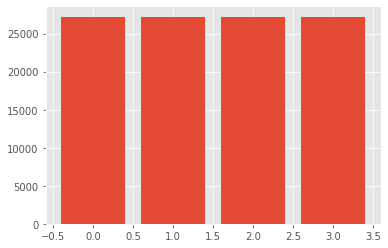

In [38]:
# transform the dataset oversampling using SMOTE to handle imbalance data
oversample = SMOTE()
X, y = oversample.fit_resample(df_required_Num, Y_df_required_Num)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [39]:
# Training and Test data split
X_train, X_test, y_train, y_test = train_test_split(df_required_Num, Y_df_required_Num, test_size=0.30, random_state=42)

In [40]:
# Training and Test data split
X_trainS, X_testS, y_trainS, y_testS = train_test_split(X, y, test_size=0.30, random_state=42)

In [186]:
df_required_Num.columns

Index(['IS_FINANCIAL_LEAD', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'COMPANY_NETWORTH', 'COMPANY_NETWORTH_var', 'SIC_CODE_var',
       'NUMBER_OF_EMPLOYEES_var', 'CITY_nominal',
       'INDUSTRY_DESCRIPTION_Nominal', 'Status_Ordinal',
       'COMPANY_SIZE_Ordinal', 'IMPORTER_EXPORTER_Ordinal'],
      dtype='object')

In [41]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [42]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [43]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [44]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [45]:
classifier=xgboost.XGBClassifier()
random_searchS=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [46]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(df_required_Num,Y_df_required_Num)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[11:37:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No


 Time taken: 0 hours 17 minutes and 20.14 seconds.


In [29]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [27]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_searchS.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[13:12:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No


 Time taken: 0 hours 39 minutes and 28.81 seconds.


In [28]:
random_searchS.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
tunedclassifierS=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
eval_set = [(X_testS, y_testS)]
tunedclassifierS.fit(X_trainS, y_trainS, eval_metric="mlogloss", eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:1.32496
[1]	validation_0-mlogloss:1.26960
[2]	validation_0-mlogloss:1.22540
[3]	validation_0-mlogloss:1.18223
[4]	validation_0-mlogloss:1.13313
[5]	validation_0-mlogloss:1.08527
[6]	validation_0-mlogloss:1.04199
[7]	validation_0-mlogloss:1.01600
[8]	validation_0-mlogloss:0.98553
[9]	validation_0-mlogloss:0.95370
[10]	validation_0-mlogloss:0.92111
[11]	validation_0-mlogloss:0.88330
[12]	validation_0-mlogloss:0.84361
[13]	validation_0-mlogloss:0.81686
[14]	validation_0-mlogloss:0.79407
[15]	validation_0-mlogloss:0.76616
[16]	validation_0-mlogloss:0.74442
[17]	validation_0-mlogloss:0.72713
[18]	validation_0-mlogloss:0.70274
[19]	validation_0-mlogloss:0.68553
[20]	validation_0-mlogloss:0.67127
[21]	validation_0-mlogloss:0.65323
[22]	validation_0-mlogloss:0.64280
[23]	validation_0-mlogloss:0.62918
[24]	validation_0-mlogloss:0.61981
[25]	validation_0-mlogloss:0.60825
[26]	validation_0-mlogloss:0.60059
[27]	validation_0-mlogloss:0.58154
[28]	validation_0-mlogloss:0.5

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
# Checking for the Overfitting with 'mgloss' in traing and testing dataset
eval_set = [(X_trainS, y_trainS),(X_testS, y_testS)]
tunedclassifierS.fit(X_trainS, y_trainS, eval_metric="mlogloss", eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:1.32447	validation_1-mlogloss:1.32496
[1]	validation_0-mlogloss:1.26897	validation_1-mlogloss:1.26960
[2]	validation_0-mlogloss:1.22449	validation_1-mlogloss:1.22540
[3]	validation_0-mlogloss:1.18111	validation_1-mlogloss:1.18223
[4]	validation_0-mlogloss:1.13198	validation_1-mlogloss:1.13313
[5]	validation_0-mlogloss:1.08394	validation_1-mlogloss:1.08527
[6]	validation_0-mlogloss:1.04043	validation_1-mlogloss:1.04199
[7]	validation_0-mlogloss:1.01399	validation_1-mlogloss:1.01600
[8]	validation_0-mlogloss:0.98330	validation_1-mlogloss:0.98553
[9]	validation_0-mlogloss:0.95115	validation_1-mlogloss:0.95370
[10]	validation_0-mlogloss:0.91791	validation_1-mlogloss:0.92111
[11]	validation_0-mlogloss:0.87964	validation_1-mlogloss:0.88330
[12]	validation_0-mlogloss:0.83966	validation_1-mlogloss:0.84361
[13]	validation_0-mlogloss:0.81259	validation_1-mlogloss:0.81686
[14]	validation_0-mlogloss:0.78976	validation_1-mlogloss:0.79407
[15]	validation_0-mlogloss:0.76152	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0, 0.5, 'Classification Error')

Text(0.5, 1.0, 'XGBoost Classification Error')

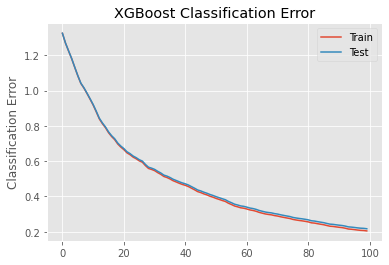

In [32]:

# retrieve performance metrics
results = tunedclassifierS.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [33]:
y_predS = tunedclassifierS.predict(X_testS)
y_predS_proba = tunedclassifierS.predict_proba(X_testS)

In [34]:
print(confusion_matrix(y_testS, y_predS))
print(accuracy_score(y_testS, y_predS))
print(classification_report(y_testS, y_predS))

[[7648  269   75  144]
 [  88 7867   63  308]
 [   2    7 8080   40]
 [   6   48   35 7980]]
0.9667789344764237
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8136
           1       0.96      0.94      0.95      8326
           2       0.98      0.99      0.99      8129
           3       0.94      0.99      0.96      8069

    accuracy                           0.97     32660
   macro avg       0.97      0.97      0.97     32660
weighted avg       0.97      0.97      0.97     32660



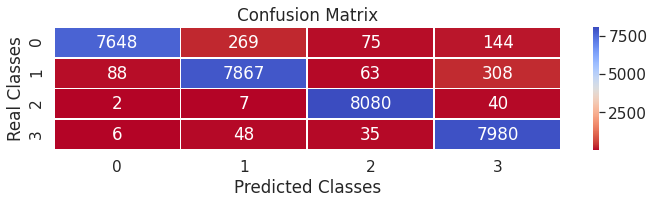

In [37]:
pred = y_predS
y_test_Rating0 = y_test.value_counts()[0]
y_test_Rating1 = y_test.value_counts()[1]
y_test_Rating2 = y_test.value_counts()[2]
y_test_Rating3 = y_test.value_counts()[3]
sns.set(font_scale=1.4)
#sns.set(fmt='g')   
PlotConfusionMatrix(y_testS,pred,y_test_Rating0,y_test_Rating1,y_test_Rating2, y_test_Rating3)

In [38]:
#Finding TPR,FPR for multiclass classification
cnf_matrix=confusion_matrix(y_testS, y_predS)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [39]:
print(TPR)
print(FPR)
print(ACC)

[0.94001967 0.94487149 0.9939722  0.98897013]
[0.00391453 0.0133147  0.0070523  0.02000732]
[0.9821188  0.97602572 0.99320269 0.98221066]


In [40]:
TPRdf = pd.DataFrame([[0.94001967, 0.94487149, 0.9939722,  0.98897013]], columns = ['Class0_TPR','Class1_TPR','Class2_TPR', 'Class3_TPR'])
TPRdf

FPRdf = pd.DataFrame([[0.00391453, 0.0133147,  0.0070523,  0.02000732]], columns = ['Class0_FPR','Class1_FPR','Class2_FPR', 'Class3_FPR'])
FPRdf

ACCdf = pd.DataFrame([[0.9821188,  0.97602572, 0.99320269, 0.98221066]], columns = ['Class0_ACC','Class1_ACC','Class2_ACC', 'Class3_ACC'])
ACCdf


,Class0_TPR,Class1_TPR,Class2_TPR,Class3_TPR
0,0.94002,0.944871,0.993972,0.98897


,Class0_FPR,Class1_FPR,Class2_FPR,Class3_FPR
0,0.003915,0.013315,0.007052,0.020007


,Class0_ACC,Class1_ACC,Class2_ACC,Class3_ACC
0,0.982119,0.976026,0.993203,0.982211


In [41]:
TPRdf.style.format({
    'Class0_TPR': '{:,.4%}'.format,
    'Class1_TPR': '{:,.4%}'.format,
    'Class2_TPR': '{:,.4%}'.format,
    'Class3_TPR': '{:,.4%}'.format,
})

FPRdf.style.format({
    'Class0_FPR': '{:,.4%}'.format,
    'Class1_FPR': '{:,.4%}'.format,
    'Class2_FPR': '{:,.4%}'.format,
    'Class3_FPR': '{:,.4%}'.format,
})

ACCdf.style.format({
    'Class0_ACC': '{:,.4%}'.format,
    'Class1_ACC': '{:,.4%}'.format,
    'Class2_ACC': '{:,.4%}'.format,
    'Class3_ACC': '{:,.4%}'.format,
})

,Class0_TPR,Class1_TPR,Class2_TPR,Class3_TPR
0,94.0020%,94.4871%,99.3972%,98.8970%


,Class0_FPR,Class1_FPR,Class2_FPR,Class3_FPR
0,0.3915%,1.3315%,0.7052%,2.0007%


,Class0_ACC,Class1_ACC,Class2_ACC,Class3_ACC
0,98.2119%,97.6026%,99.3203%,98.2211%


In [ ]:
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
                         [[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0', 'True 1', 'True 2', 'True 3'], 
            columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3'])
conf_matrix(y_testS,y_predS)

Text(0.5, 1.0, 'Multiclass ROC curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive rate')

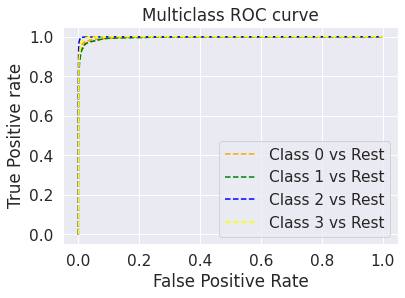

In [42]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testS, y_predS_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [156]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    ####################################
    # The optimal cut off would be where tpr is high and fpr is low
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
    ####################################

    """
    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 4

    for i in range(n_class):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y_testS, y_predS_proba[:,i], pos_label=i)
    
    #fpr, tpr, threshold = roc_curve(y_test, y_predS_proba)
    i = np.arange(len(tpr)) 
    # tpr -(1-fpr) is zero near the optimal point
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)}) # using Youden’s J statistic. 
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold']),roc

In [158]:
optimal_cutoff,roc = Find_Optimal_Cutoff(y_test, y_predS_proba)
print (optimal_cutoff)

TypeError: unsupported operand type(s) for -: 'int' and 'dict'

In [141]:
param_gridS = {
    'learning_rate': [random_searchS.best_params_['learning_rate']],
    'max_depth': [random_searchS.best_params_['max_depth']],
    'gamma': [random_searchS.best_params_['gamma']],
    'min_child_weight': [random_searchS.best_params_['min_child_weight'], 
                         random_searchS.best_params_['min_child_weight']+2, 
                         random_searchS.best_params_['min_child_weight'] + 4],
    'min_child_weight': [random_searchS.best_params_['min_child_weight'] - 1,
                        random_searchS.best_params_['min_child_weight'], 
                        random_searchS.best_params_['min_child_weight'] +1,
                        random_searchS.best_params_['min_child_weight'] + 2],
    'colsample_bytree': [random_searchS.best_params_['colsample_bytree'] - 0.2, random_searchS.best_params_['colsample_bytree'] - 0.1, 
                     random_searchS.best_params_['colsample_bytree'], 
                     random_searchS.best_params_['colsample_bytree'] + 0.2, random_searchS.best_params_['colsample_bytree'] + 0.1]
}

print(param_gridS)

{'learning_rate': [0.1], 'max_depth': [8], 'gamma': [0.1], 'min_child_weight': [0, 1, 2, 3], 'colsample_bytree': [0.2, 0.30000000000000004, 0.4, 0.6000000000000001, 0.5]}


In [143]:
#### Fit the grid_search to the data
grid_searchS=GridSearchCV(estimator=classifier,param_grid=param_gridS,cv=10,n_jobs=-1,scoring='roc_auc',verbose=3)


In [144]:
start_time = timer(None) # timing starts from this point for "start_time" variable
grid_searchS.fit(X,y)
timer(start_time)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[12:19:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va


 Time taken: 3 hours 9 minutes and 59.8 seconds.


In [146]:
grid_searchS.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [147]:
tunedclassifier_S=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=0, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [148]:
tunedclassifier_S.fit(X_trainS, y_trainS)

[12:31:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [149]:
y_pred_S = tunedclassifier_S.predict(X_testS)

In [150]:
print(confusion_matrix(y_testS, y_pred_S))
print(accuracy_score(y_testS, y_pred_S))
print(classification_report(y_testS, y_pred_S))

[[7219  436  197  284]
 [ 356 7153  170  647]
 [  38   94 7808  189]
 [  22  171  199 7677]]
0.9141763625229639
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8136
           1       0.91      0.86      0.88      8326
           2       0.93      0.96      0.95      8129
           3       0.87      0.95      0.91      8069

    accuracy                           0.91     32660
   macro avg       0.92      0.91      0.91     32660
weighted avg       0.92      0.91      0.91     32660



In [142]:
param_grid = {
    'learning_rate': [random_search.best_params_['learning_rate']],
    'max_depth': [random_search.best_params_['max_depth']],
    'gamma': [random_search.best_params_['gamma']],
    'min_child_weight': [random_search.best_params_['min_child_weight'], 
                         random_search.best_params_['min_child_weight']+2, 
                         random_search.best_params_['min_child_weight'] + 4],
    'min_child_weight': [random_search.best_params_['min_child_weight'] - 1,
                        random_search.best_params_['min_child_weight'], 
                        random_search.best_params_['min_child_weight'] +1,
                        random_search.best_params_['min_child_weight'] + 2],
    'colsample_bytree': [random_search.best_params_['colsample_bytree'] - 0.2, random_search.best_params_['colsample_bytree'] - 0.1, 
                     random_search.best_params_['colsample_bytree'], 
                     random_search.best_params_['colsample_bytree'] + 0.2, random_search.best_params_['colsample_bytree'] + 0.1]
}

print(param_grid)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [39]:
#### Fit the grid_search to the data
grid_search=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=10,n_jobs=-1,scoring='roc_auc',verbose=3)


In [40]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
grid_search.fit(df_required_Num,Y_df_required_Num)
timer(start_time)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[19:23:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_job...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va


 Time taken: 1 hours 43 minutes and 1.91 seconds.


In [41]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
grid_search.best_params_

{'colsample_bytree': 0.2,
 'gamma': 0.4,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 0}

In [32]:
tunedclassifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=0, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
tunedclassifier.fit(X_train, y_train)

[14:02:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
# Predicting the Test set results
y_pred = tunedclassifier.predict(X_test)

In [35]:
# Making the Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [50]:
cm

array([[8147,    0,    0,    0],
       [ 196,    0,    0,    0],
       [  26,    0,    0,    0],
       [  40,    0,    0,    0]])

In [36]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

In [52]:
accuracy

0.968842906409799

In [29]:
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])

In [37]:
conf_matrix(y_test,y_pred)

ValueError: too many values to unpack (expected 2)

In [ ]:
def plot_ROC(fpr_r, tpr_r,thresholds,roc_auc_r,cut_off_value_r=0):
    plt.clf()
    # Plot ROC
    plt.figure(figsize=(10, 8))
    plt.plot(fpr_r, tpr_r,label='ROC curve (area = %0.2f)' % (roc_auc_r))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',fontsize=15)
    plt.ylabel('True Positive Rate',fontsize=15)
    plt.title('Receiver operating characteristic',fontsize=15)
    plt.legend(loc="lower right")
    if cut_off_value_r != 0:
        plt.axvline(x=cut_off_value_r,color='r')


    # create the axis of thresholds (scores)
    #ax2 =lt.gca().twinx()
    #ax2.plot(fpr_r, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
    #ax2.set_ylabel('Th preshold',color='r')
    #ax2.set_ylim([thresholds[-1],thresholds[0]])
    #ax2.set_xlim([fpr_r[0],fpr_r[-1]])
    

plot_ROC(fpr_test_old, tpr_test_old,thresholds_test_old,roc_auc_test_old)

In [38]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[8147    0    0    0]
 [ 196    0    0    0]
 [  26    0    0    0]
 [  40    0    0    0]]
0.968842906409799
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8147
           1       0.00      0.00      0.00       196
           2       0.00      0.00      0.00        26
           3       0.00      0.00      0.00        40

    accuracy                           0.97      8409
   macro avg       0.24      0.25      0.25      8409
weighted avg       0.94      0.97      0.95      8409



In [36]:
def PlotConfusionMatrix(y_test,pred,y_test_Rating0,y_test_Rating1,y_test_Rating2, y_test_Rating3):

    cfn_matrix = confusion_matrix(y_test,pred)
    #cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    #norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(25,5))
    ax = fig.add_subplot(2,2,2)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.9,annot=True,ax=ax,fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    #ax = fig.add_subplot(1,2,2)
    #sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    #plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    #print('---Classification Report---')
    #print(classification_report(y_test,pred))

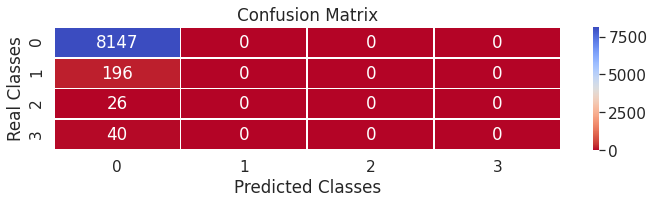

In [71]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve,accuracy_score
import seaborn as sns
pred = y_pred
y_test_Rating0 = y_test.value_counts()[0]
y_test_Rating1 = y_test.value_counts()[1]
y_test_Rating2 = y_test.value_counts()[2]
y_test_Rating3 = y_test.value_counts()[3]
sns.set(font_scale=1.4)
#sns.set(fmt='g')   
PlotConfusionMatrix(y_test,pred,y_test_Rating0,y_test_Rating1,y_test_Rating2, y_test_Rating3) 

In [48]:
classes = np.unique(y_train, axis = 0)
classes
classes.sort()
class_samples = np.bincount(y_train)
class_samples
total_samples = class_samples.sum()
total_samples
n_classes = len(class_samples)
n_classes
weights = total_samples / (n_classes * class_samples * 1.0)
weights
class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
class_weight_dict

array([0, 1, 2, 3])

array([19069,   411,    66,    73])

19619

4

array([ 0.25721066, 11.9336983 , 74.31439394, 67.18835616])

{0: 0.25721065603859666,
 1: 11.933698296836983,
 2: 74.31439393939394,
 3: 67.18835616438356}

In [76]:
weights = total_samples / (n_classes * class_samples * 1.0)
tunedclassifier_weight=xgboost.XGBClassifier(sample_weight=weights)

In [77]:
tunedclassifier_weight.fit(X_train, y_train)

[16:13:06] WARNING: ../src/learner.cc:573: 
Parameters: { "sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:13:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1,
              sample_weight=array([ 0.25721066, 11.9336983 , 74.31439394, 67.18835616]),
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [95]:
# Predicting the Test set results
y_pred_w = tunedclassifier_weight.predict(X_test)
y_pred_w_predict_proba = tunedclassifier_weight.predict_proba(X_test)


In [112]:
#Finding TPR,FPR for multiclass classification
cnf_matrix=confusion_matrix(y_test, y_pred_w)
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [126]:
#f'TPR = {TPR:1.2%})'
print(TNR)
#print(FPR)
#print(ACC)

[0.52290076 1.         0.99988071 1.        ]


In [128]:
print(f"TPR =  {TPR}")

TPR =  [0.99987726 0.52040816 0.69230769 0.425     ]


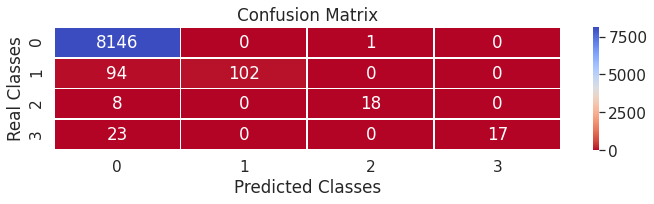

In [79]:
pred = y_pred_w
y_test_Rating0 = y_test.value_counts()[0]
y_test_Rating1 = y_test.value_counts()[1]
y_test_Rating2 = y_test.value_counts()[2]
y_test_Rating3 = y_test.value_counts()[3]
sns.set(font_scale=1.4)
#sns.set(fmt='g')   
PlotConfusionMatrix(y_test,pred,y_test_Rating0,y_test_Rating1,y_test_Rating2, y_test_Rating3) 

Text(0.5, 1.0, 'Multiclass ROC curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive rate')

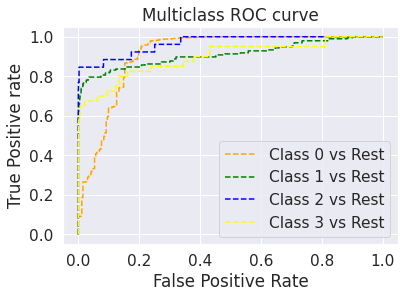

In [96]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_w_predict_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

<Figure size 576x360 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0.48, 'Random Guess')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

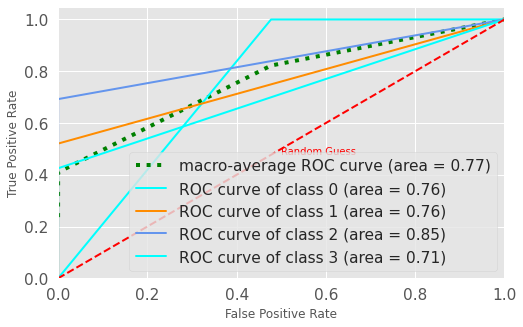

In [110]:
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(y_pred_w))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic for Naive Bayes - IRIS DATASET')
plt.legend(loc="lower right")
plt.show()

In [108]:
from sklearn.metrics import multilabel_confusion_matrix
print(confusion_matrix(y_test, y_pred_w))
print(accuracy_score(y_test, y_pred_w))
print(classification_report(y_test, y_pred_w))

[[8146    0    1    0]
 [  94  102    0    0]
 [   8    0   18    0]
 [  23    0    0   17]]
0.9850160542276133
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8147
           1       1.00      0.52      0.68       196
           2       0.95      0.69      0.80        26
           3       1.00      0.42      0.60        40

    accuracy                           0.99      8409
   macro avg       0.98      0.66      0.77      8409
weighted avg       0.99      0.99      0.98      8409



In [99]:
def conf_matrix(y,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y, pred, normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
                         [[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0', 'True 1', 'True 2', 'True 3'], 
            columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3'])
conf_matrix(y_test,y_pred_w)

ValueError: too many values to unpack (expected 2)

In [97]:
y_pred_w

array([9.8522141e-05, 3.3108474e-04, 1.2599780e-05, ..., 1.0487963e-05,
       3.6625168e-04, 1.0631419e-04], dtype=float32)

In [80]:
random_search_weight=RandomizedSearchCV(tunedclassifier_weight,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [81]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search_weight.fit(df_required_Num,Y_df_required_Num)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[16:38:34] WARNING: ../src/learner.cc:573: 
Parameters: { "sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:38:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=16,
                                           num_p...
                                           sample_weight=array([ 0.25721066, 11.9336983 , 74.31439394, 67.18835616]),
                  


 Time taken: 0 hours 13 minutes and 20.13 seconds.


In [82]:
random_search_weight.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1,
              sample_weight=array([ 0.25721066, 11.9336983 , 74.31439394, 67.18835616]),
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [86]:
weights = total_samples / (n_classes * class_samples * 1.0)
tunedclassifier_weight_RCV=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1,
              sample_weight=weights,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [87]:
tunedclassifier_weight_RCV.fit(X_train, y_train)

[16:53:54] WARNING: ../src/learner.cc:573: 
Parameters: { "sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:53:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1,
              sample_weight=array([ 0.25721066, 11.9336983 , 74.31439394, 67.18835616]),
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [88]:
y_pred_wRV=tunedclassifier_weight_RCV.predict(X_test)

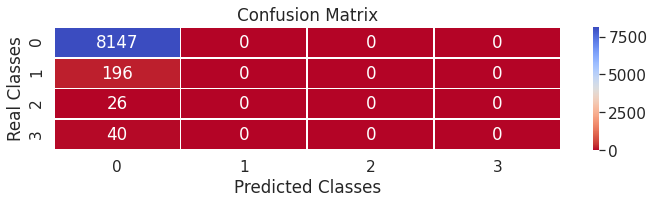

In [89]:
pred = y_pred_wRV
y_test_Rating0 = y_test.value_counts()[0]
y_test_Rating1 = y_test.value_counts()[1]
y_test_Rating2 = y_test.value_counts()[2]
y_test_Rating3 = y_test.value_counts()[3]
sns.set(font_scale=1.4)
#sns.set(fmt='g')   
PlotConfusionMatrix(y_test,pred,y_test_Rating0,y_test_Rating1,y_test_Rating2, y_test_Rating3) 

In [63]:
def class_weight(labels_dict,mu=0.15):
    total = np.sum(labels_dict.values())
    keys = labels_dict.keys()
    weight = dict()
    for i in keys:
        score = np.log(mu*total/float(labels_dict[i]))
        weight[i] = score if score > 1 else 1
        return weight
# random labels_dict
labels_dict = Y_df_required_Num.value_counts().to_dict()
weights = class_weight(labels_dict)

TypeError: unsupported operand type(s) for *: 'float' and 'dict_values'

In [66]:
Y_df_required_Num.value_counts().to_dict()

{0: 27216, 1: 607, 3: 113, 2: 92}

In [73]:
weights = Y_df_required_Num.value_counts()/len(Y_df_required_Num)
Nontunedclassifier_weight=xgboost.XGBClassifier(sample_weight=weights)
Nontunedclassifier_weight.fit(X_train, y_train)

[16:12:31] WARNING: ../src/learner.cc:573: 
Parameters: { "sample_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:12:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1,
              sample_weight=0    0.971029
1    0.021657
3    0.004032
2    0.003282
Name: Rating, dtype: float64,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [74]:
# Predicting the Test set results
y_pred_ntw = Nontunedclassifier_weight.predict(X_test)

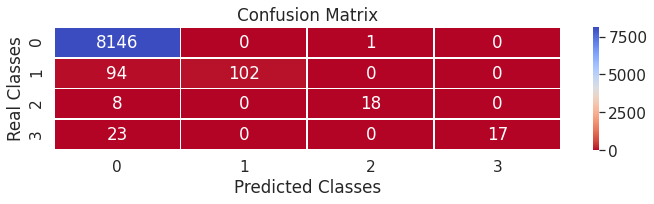

In [75]:
pred = y_pred_ntw
y_test_Rating0 = y_test.value_counts()[0]
y_test_Rating1 = y_test.value_counts()[1]
y_test_Rating2 = y_test.value_counts()[2]
y_test_Rating3 = y_test.value_counts()[3]
sns.set(font_scale=1.4)
#sns.set(fmt='g')   
PlotConfusionMatrix(y_test,pred,y_test_Rating0,y_test_Rating1,y_test_Rating2, y_test_Rating3) 

In [183]:
#Creating a seperate model without the Ratings '0' class data
df_required_Num_Master.Rating.value_counts()

0    27216
1      607
3      113
2       92
Name: Rating, dtype: int64

In [43]:
df_required_Num_nonzero = df_required_Num_Master[df_required_Num_Master['Rating'] != 0]

In [44]:
df_required_Num_nonzero.Rating.value_counts()

1    607
3    113
2     92
Name: Rating, dtype: int64

In [45]:
df_required_Num_onlyzero = df_required_Num_Master[df_required_Num_Master['Rating'] == 0]

In [210]:
df_required_Num_onlyzero.Rating.value_counts()

0    27216
Name: Rating, dtype: int64

In [46]:
#Seperating Dependent and independent variables  with all columns
df_required_Num_nonzero_Master = df_required_Num_nonzero.copy()
Y_df_required_Num_nonzero = df_required_Num_nonzero.Rating
X_df_required_Num_nonzero = df_required_Num_nonzero.drop(['Rating'], axis=1, inplace=True)
#Y_df_required_Num = df_required_Num.Rating


Class=1, n=607 (33.333%)
Class=3, n=607 (33.333%)
Class=2, n=607 (33.333%)


<BarContainer object of 3 artists>

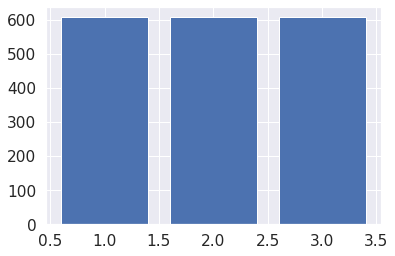

In [47]:
# transform the dataset oversampling using SMOTE to handle imbalance data
oversample = SMOTE()
X, y = oversample.fit_resample(df_required_Num_nonzero, Y_df_required_Num_nonzero)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [48]:
# Training and Test data split
X_trainSNONZERO, X_testSNONZERO, y_trainSNONZERO, y_testSNONZERO = train_test_split(X, y, test_size=0.30, random_state=42)

In [49]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

classifier=xgboost.XGBClassifier()
random_searchSNONZERO=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [50]:
start_time = timer(None) # timing starts from this point for "start_time" variable
random_searchSNONZERO.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[13:42:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No


 Time taken: 0 hours 15 minutes and 50.22 seconds.


In [51]:
random_searchSNONZERO.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
tunedclassifierSNONZERO=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
eval_setNONZERO = [(X_trainSNONZERO, y_trainSNONZERO),(X_testSNONZERO, y_testSNONZERO)]
tunedclassifierSNONZERO.fit(X_trainSNONZERO, y_trainSNONZERO, eval_metric="mlogloss", eval_set=eval_setNONZERO, verbose=True)

[0]	validation_0-mlogloss:0.97957	validation_1-mlogloss:1.00154
[1]	validation_0-mlogloss:0.89376	validation_1-mlogloss:0.93216
[2]	validation_0-mlogloss:0.82459	validation_1-mlogloss:0.87295
[3]	validation_0-mlogloss:0.76421	validation_1-mlogloss:0.82509
[4]	validation_0-mlogloss:0.69934	validation_1-mlogloss:0.76869
[5]	validation_0-mlogloss:0.64753	validation_1-mlogloss:0.71937
[6]	validation_0-mlogloss:0.60783	validation_1-mlogloss:0.68093
[7]	validation_0-mlogloss:0.56198	validation_1-mlogloss:0.63679
[8]	validation_0-mlogloss:0.53355	validation_1-mlogloss:0.61067
[9]	validation_0-mlogloss:0.50531	validation_1-mlogloss:0.58984
[10]	validation_0-mlogloss:0.48995	validation_1-mlogloss:0.57764
[11]	validation_0-mlogloss:0.46354	validation_1-mlogloss:0.55309
[12]	validation_0-mlogloss:0.43849	validation_1-mlogloss:0.53027
[13]	validation_0-mlogloss:0.43014	validation_1-mlogloss:0.52240
[14]	validation_0-mlogloss:0.40645	validation_1-mlogloss:0.50331
[15]	validation_0-mlogloss:0.38532	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [205]:
y_testSNONZERO

8278     1
19824    1
7625     3
9549     1
18143    1
27404    2
7391     1
21453    2
11033    1
19549    2
2410     3
7647     1
15452    1
27696    2
8709     3
15023    3
10868    1
4285     1
13630    1
18088    1
5188     1
2480     1
12722    1
12740    1
615      1
517      1
24897    1
7452     1
7460     1
2846     3
22921    1
22035    2
23216    1
24446    2
24063    3
324      1
12689    1
14377    1
2051     3
7180     1
2261     1
17506    3
9574     1
5141     1
21800    2
7462     1
18087    1
23732    3
18268    1
19572    2
12093    1
21985    1
24061    3
24445    2
10078    1
14400    1
19031    1
3401     1
16501    1
20322    2
11718    1
21561    2
4914     1
6291     3
25260    1
6168     3
9446     1
886      1
3461     1
5821     1
23168    1
16762    3
21451    2
27695    2
553      1
547      1
21481    3
9181     1
11809    1
13546    1
7461     1
15329    1
16056    1
2727     1
2845     3
16622    1
17928    1
12586    1
21521    2
22666    1
9344     3

Text(0, 0.5, 'Classification Error')

Text(0.5, 1.0, 'XGBoost Classification Error')

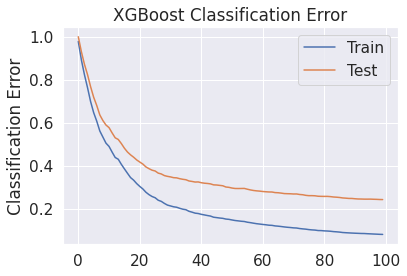

In [54]:
# retrieve performance metrics
resultsNONZERO = tunedclassifierSNONZERO.evals_result()
epochsNONZERO = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, resultsNONZERO['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, resultsNONZERO['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [55]:
tunedclassifierSNONZERO.fit(X_trainSNONZERO, y_trainSNONZERO, early_stopping_rounds =10, eval_metric="mlogloss", eval_set=eval_setNONZERO, verbose=True)

[0]	validation_0-mlogloss:0.97957	validation_1-mlogloss:1.00154
[1]	validation_0-mlogloss:0.89376	validation_1-mlogloss:0.93216
[2]	validation_0-mlogloss:0.82459	validation_1-mlogloss:0.87295
[3]	validation_0-mlogloss:0.76421	validation_1-mlogloss:0.82509
[4]	validation_0-mlogloss:0.69934	validation_1-mlogloss:0.76869
[5]	validation_0-mlogloss:0.64753	validation_1-mlogloss:0.71937
[6]	validation_0-mlogloss:0.60783	validation_1-mlogloss:0.68093
[7]	validation_0-mlogloss:0.56198	validation_1-mlogloss:0.63679
[8]	validation_0-mlogloss:0.53355	validation_1-mlogloss:0.61067
[9]	validation_0-mlogloss:0.50531	validation_1-mlogloss:0.58984
[10]	validation_0-mlogloss:0.48995	validation_1-mlogloss:0.57764
[11]	validation_0-mlogloss:0.46354	validation_1-mlogloss:0.55309
[12]	validation_0-mlogloss:0.43849	validation_1-mlogloss:0.53027
[13]	validation_0-mlogloss:0.43014	validation_1-mlogloss:0.52240
[14]	validation_0-mlogloss:0.40645	validation_1-mlogloss:0.50331
[15]	validation_0-mlogloss:0.38532	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
y_predSNONZERO = tunedclassifierSNONZERO.predict(X_testSNONZERO)
y_predSNONZERO_proba = tunedclassifierSNONZERO.predict_proba(X_testSNONZERO)

In [227]:
y_predSNONZERO

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 3, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 3, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 3, 2, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [57]:

print(confusion_matrix(y_testSNONZERO, y_predSNONZERO))
print(accuracy_score(y_testSNONZERO, y_predSNONZERO))
print(classification_report(y_testSNONZERO, y_predSNONZERO))


[[156   8   8]
 [  3 161  12]
 [  8   4 187]]
0.9213893967093236
              precision    recall  f1-score   support

           1       0.93      0.91      0.92       172
           2       0.93      0.91      0.92       176
           3       0.90      0.94      0.92       199

    accuracy                           0.92       547
   macro avg       0.92      0.92      0.92       547
weighted avg       0.92      0.92      0.92       547



In [58]:
def PlotConfusionMatrixNZ(y_test,pred,y_test_Rating1,y_test_Rating2, y_test_Rating3):

    cfn_matrix = confusion_matrix(y_test,pred)
    #cfn_norm_matrix = np.array([[1.0 / y_test_legit,1.0/y_test_legit],[1.0/y_test_fraud,1.0/y_test_fraud]])
    #norm_cfn_matrix = cfn_matrix * cfn_norm_matrix

    fig = plt.figure(figsize=(25,5))
    ax = fig.add_subplot(2,2,2)
    sns.heatmap(cfn_matrix,cmap='coolwarm_r',linewidths=0.9,annot=True,ax=ax,fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')

    #ax = fig.add_subplot(1,2,2)
    #sns.heatmap(norm_cfn_matrix,cmap='coolwarm_r',linewidths=0.5,annot=True,ax=ax)

    #plt.title('Normalized Confusion Matrix')
    plt.ylabel('Real Classes')
    plt.xlabel('Predicted Classes')
    plt.show()
    
    #print('---Classification Report---')
    #print(classification_report(y_test,pred))

In [251]:
y_testSNONZERO.value_counts()

3    199
2    176
1    172
Name: Rating, dtype: int64

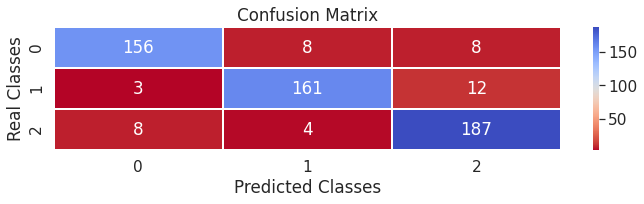

In [59]:
pred = y_predSNONZERO
#y_test_Rating0 = y_test.value_counts()[0]
y_test_Rating1 = y_testSNONZERO.value_counts()[1]
y_test_Rating2 = y_testSNONZERO.value_counts()[2]
y_test_Rating3 = y_testSNONZERO.value_counts()[3]
sns.set(font_scale=1.4)
#sns.set(fmt='g')   
PlotConfusionMatrixNZ(y_testSNONZERO,pred,y_test_Rating1,y_test_Rating2, y_test_Rating3)

In [60]:
#Finding TPR,FPR for multiclass classification
cnf_matrix=confusion_matrix(y_testSNONZERO, y_predSNONZERO)
FPNONZERO = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FNNONZERO = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TPNONZERO = np.diag(cnf_matrix)
TNNONZERO = cnf_matrix.sum() - (FPNONZERO + FNNONZERO + TPNONZERO)

FPNONZERO = FPNONZERO.astype(float)
FNNONZERO = FNNONZERO.astype(float)
TPNONZERO = TPNONZERO.astype(float)
TNNONZERO = TNNONZERO.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPRNONZERO = TPNONZERO/(TPNONZERO+FNNONZERO)
# Specificity or true negative rate
TNRNONZERO = TNNONZERO/(TNNONZERO+FPNONZERO) 
# Precision or positive predictive value
PPVNONZERO = TPNONZERO/(TPNONZERO+FPNONZERO)
# Negative predictive value
NPVNONZERO = TNNONZERO/(TNNONZERO+FNNONZERO)
# Fall out or false positive rate
FPRNONZERO = FPNONZERO/(FPNONZERO+TNNONZERO)
# False negative rate
FNRNONZERO = FNNONZERO/(TPNONZERO+FNNONZERO)
# False discovery rate
FDRNONZERO = FPNONZERO/(TPNONZERO+FPNONZERO)
# Overall accuracy
ACCNONZERO = (TPNONZERO+TNNONZERO)/(TPNONZERO+FPNONZERO+FNNONZERO+TNNONZERO)

print(TPRNONZERO)
print(FPRNONZERO)
print(ACCNONZERO)

[0.90697674 0.91477273 0.93969849]
[0.02933333 0.03234501 0.05747126]
[0.95063985 0.95063985 0.94149909]


In [61]:
TPRdfNONZERO = pd.DataFrame([[90697674, 0.91477273, 0.93969849]], columns = ['Class1_TPR','Class2_TPR', 'Class3_TPR'])
TPRdfNONZERO

FPRdfNONZERO = pd.DataFrame([[0.02933333, 0.03234501, 0.05747126]], columns = ['Class1_FPR','Class2_FPR', 'Class3_FPR'])
FPRdfNONZERO

ACCdfNONZERO = pd.DataFrame([[0.95063985, 0.95063985, 0.94149909]], columns = ['Class1_ACC','Class2_ACC', 'Class3_ACC'])
ACCdfNONZERO

TPRdfNONZERO.style.format({
    'Class0_TPR': '{:,.4%}'.format,
    'Class1_TPR': '{:,.4%}'.format,
    'Class2_TPR': '{:,.4%}'.format,
    'Class3_TPR': '{:,.4%}'.format,
})

FPRdfNONZERO.style.format({
    'Class0_FPR': '{:,.4%}'.format,
    'Class1_FPR': '{:,.4%}'.format,
    'Class2_FPR': '{:,.4%}'.format,
    'Class3_FPR': '{:,.4%}'.format,
})

ACCdfNONZERO.style.format({
    'Class0_ACC': '{:,.4%}'.format,
    'Class1_ACC': '{:,.4%}'.format,
    'Class2_ACC': '{:,.4%}'.format,
    'Class3_ACC': '{:,.4%}'.format,
})


,Class1_TPR,Class2_TPR,Class3_TPR
0,90697674,0.914773,0.939698


,Class1_FPR,Class2_FPR,Class3_FPR
0,0.029333,0.032345,0.057471


,Class1_ACC,Class2_ACC,Class3_ACC
0,0.95064,0.95064,0.941499


,Class1_TPR,Class2_TPR,Class3_TPR
0,"9,069,767,400.0000%",91.4773%,93.9698%


,Class1_FPR,Class2_FPR,Class3_FPR
0,2.9333%,3.2345%,5.7471%


,Class1_ACC,Class2_ACC,Class3_ACC
0,95.0640%,95.0640%,94.1499%


Text(0.5, 1.0, 'Multiclass ROC curve')

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive rate')

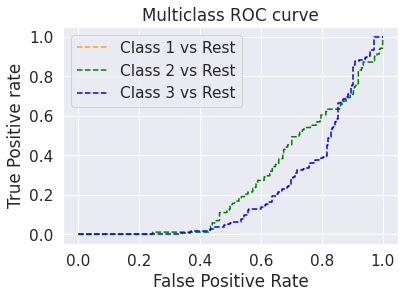

In [62]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_testSNONZERO, y_predSNONZERO_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 2 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 3 vs Rest')
#plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')



In [257]:
df_required_Num_onlyzero.columns

Index(['IS_FINANCIAL_LEAD', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'COMPANY_NETWORTH', 'Rating', 'COMPANY_NETWORTH_var', 'SIC_CODE_var',
       'NUMBER_OF_EMPLOYEES_var', 'CITY_nominal',
       'INDUSTRY_DESCRIPTION_Nominal', 'Status_Ordinal',
       'COMPANY_SIZE_Ordinal', 'IMPORTER_EXPORTER_Ordinal'],
      dtype='object')

In [63]:
df_required_Num_onlyzero_test = df_required_Num_onlyzero[['IS_FINANCIAL_LEAD', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'COMPANY_NETWORTH', 'COMPANY_NETWORTH_var', 'SIC_CODE_var',
       'NUMBER_OF_EMPLOYEES_var', 'CITY_nominal',
       'INDUSTRY_DESCRIPTION_Nominal', 'Status_Ordinal',
       'COMPANY_SIZE_Ordinal', 'IMPORTER_EXPORTER_Ordinal']]

In [64]:
y_predSZEROTEST = tunedclassifierSNONZERO.predict(df_required_Num_onlyzero_test)

In [65]:
df_required_Num_onlyzero_test['Predicted_Ratings'] = y_predSZEROTEST

In [261]:
df_required_Num_onlyzero_test.columns

Index(['IS_FINANCIAL_LEAD', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'COMPANY_NETWORTH', 'COMPANY_NETWORTH_var', 'SIC_CODE_var',
       'NUMBER_OF_EMPLOYEES_var', 'CITY_nominal',
       'INDUSTRY_DESCRIPTION_Nominal', 'Status_Ordinal',
       'COMPANY_SIZE_Ordinal', 'IMPORTER_EXPORTER_Ordinal',
       'Predicted_Ratings'],
      dtype='object')

In [66]:
df_required_Num_onlyzero_test.Predicted_Ratings.value_counts()

1    21802
3     2842
2     2572
Name: Predicted_Ratings, dtype: int64

In [263]:
df_required_Num_onlyzero_test.to_csv('df_required_Num_onlyzero_test.csv', index = False)

In [70]:
df_required_Num_onlyzero_test.columns
dfZERO.columns

Index(['IS_FINANCIAL_LEAD', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'COMPANY_NETWORTH', 'COMPANY_NETWORTH_var', 'SIC_CODE_var',
       'NUMBER_OF_EMPLOYEES_var', 'CITY_nominal',
       'INDUSTRY_DESCRIPTION_Nominal', 'Status_Ordinal',
       'COMPANY_SIZE_Ordinal', 'IMPORTER_EXPORTER_Ordinal',
       'Predicted_Ratings'],
      dtype='object')

Index(['Company_ID', 'Status', 'IS_FINANCIAL_LEAD', 'Company Name', 'CITY',
       'COMPANY_SIZE', 'NUMBER_OF_EMPLOYEES', 'SIC_CODE',
       'INDUSTRY_DESCRIPTION', 'COMPANY_NETWORTH', 'IMPORTER_EXPORTER',
       'Rating'],
      dtype='object')

In [80]:
dfZERO.Company_ID.value_counts()

3695535     22
667980      20
4437215     16
2051551     16
2031674     16
8792922     14
261312      12
9884103     12
3102484     12
9390238     12
2858916     12
3000416     10
1550505     10
2207415     10
2285116     10
3418970     10
3413399     10
966425      10
1905213     10
6962562     10
3330283     10
2577557     10
6456207     10
5656645     10
OC373597    10
2075721      9
5139966      9
444351       9
SC037566     9
1017514      9
6039730      9
NI015713     9
394366       9
3284109      9
4577853      8
7289055      8
SC243330     8
4502368      8
SC124381     8
7002732      8
745399       8
2888311      8
3700068      8
7645429      8
3277793      8
2381612      8
2465499      8
4572685      7
1514749      7
SO304221     7
9949678      7
2444091      7
2557590      7
500829       7
R0000419     7
NI014427     7
8929257      7
1490660      7
2882515      7
NI038590     7
3600726      7
6409298      7
270153       7
NI018324     6
759517       6
514290       6
5394680   

In [174]:
# Importing module and initializing setup using PYCARET to know the best model
from pycaret.classification import *
classification = setup(data = df_required_Num, target = 'Rating', session_id=123, log_experiment=False, experiment_name='class', 
                           #remove_multicollinearity = True,
                           #multicollinearity_threshold = 0.95, 
                           #fix_imbalance = True,
                        imputation_type='iterative')

,Description,Value
0,session_id,123
1,Target,Rating
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3"
4,Original Data,"(28028, 13)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Make_Time_Features' object has no attribute 'list_of_features'